In [2]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Import API key
#from api_keys import geoapify_key


In [3]:
# Specify the path to your CSV file
csvpath = 'Resources/reduced.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csvpath)
data_df = pd.DataFrame(data)
# Display the DataFrame
data_df


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,357091,Texas,Female,Very good,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,58.97,21.63,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
1,199859,Minnesota,Female,Good,6.0,25.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.55,56.70,23.62,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",Yes,No
2,347964,Texas,Female,Good,10.0,20.0,Within past year (anytime less than 12 months ...,Yes,12.0,"6 or more, but not all",...,1.60,61.23,23.91,Yes,No,No,Yes,"Yes, received Tdap",No,No
3,407343,Washington,Female,Fair,0.0,19.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,...,1.57,NaN,NaN,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
4,211281,Mississippi,Male,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.85,95.25,27.71,Yes,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111278,179391,Massachusetts,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.70,74.84,25.84,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
111279,36107,California,Female,Excellent,0.0,0.0,5 or more years ago,Yes,8.0,None of them,...,1.75,65.77,21.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111280,407783,Washington,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,68.04,24.96,No,Yes,No,No,"Yes, received Tdap",No,No
111281,417600,West Virginia,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,...,1.55,52.16,21.73,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
print(data_df.columns)

Index(['Unnamed: 0', 'State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [5]:
#Remove unneeded columns
cleaned_data_df=data_df[['State', 'Sex','GeneralHealth', 'PhysicalActivities', 
                         'SleepHours','HadDepressiveDisorder','BMI', 'AlcoholDrinkers']]
cleaned_data_df

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers
0,Texas,Female,Very good,Yes,6.0,No,21.63,No
1,Minnesota,Female,Good,Yes,7.0,Yes,23.62,Yes
2,Texas,Female,Good,Yes,12.0,No,23.91,Yes
3,Washington,Female,Fair,No,8.0,No,NaN,Yes
4,Mississippi,Male,Very good,Yes,7.0,No,27.71,Yes
...,...,...,...,...,...,...,...,...
111278,Massachusetts,Male,Excellent,Yes,7.0,No,25.84,Yes
111279,California,Female,Excellent,Yes,8.0,No,21.41,NaN
111280,Washington,Female,Good,Yes,6.0,No,24.96,No
111281,West Virginia,Female,Good,Yes,8.0,No,21.73,Yes


In [6]:
#Check for columns with 'Nan' values
non_nan_counts = cleaned_data_df.count()
print(non_nan_counts)

State                    111283
Sex                      111283
GeneralHealth            111004
PhysicalActivities       111021
SleepHours               109954
HadDepressiveDisorder    110565
BMI                       99064
AlcoholDrinkers           99770
dtype: int64


In [7]:
#Remove 'Nan' values from data
cleaned_data2_df=cleaned_data_df.dropna()
cleaned_data2_df

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers
0,Texas,Female,Very good,Yes,6.0,No,21.63,No
1,Minnesota,Female,Good,Yes,7.0,Yes,23.62,Yes
2,Texas,Female,Good,Yes,12.0,No,23.91,Yes
4,Mississippi,Male,Very good,Yes,7.0,No,27.71,Yes
5,California,Female,Very good,Yes,7.0,No,24.69,Yes
...,...,...,...,...,...,...,...,...
111276,Florida,Female,Good,Yes,6.0,No,28.29,No
111278,Massachusetts,Male,Excellent,Yes,7.0,No,25.84,Yes
111280,Washington,Female,Good,Yes,6.0,No,24.96,No
111281,West Virginia,Female,Good,Yes,8.0,No,21.73,Yes


In [8]:
#Make sure 'Nan' values are removed
non_nan_counts = cleaned_data2_df.count()
print(non_nan_counts)

State                    91458
Sex                      91458
GeneralHealth            91458
PhysicalActivities       91458
SleepHours               91458
HadDepressiveDisorder    91458
BMI                      91458
AlcoholDrinkers          91458
dtype: int64


In [9]:
states=cleaned_data2_df['State'].unique()
print(states)

['Texas' 'Minnesota' 'Mississippi' 'California' 'Georgia' 'Wisconsin'
 'Iowa' 'Colorado' 'Arizona' 'Michigan' 'New Hampshire' 'Indiana'
 'District of Columbia' 'Nebraska' 'Washington' 'Missouri' 'Massachusetts'
 'Maryland' 'Puerto Rico' 'Idaho' 'Alabama' 'Tennessee' 'Montana'
 'Connecticut' 'South Dakota' 'Utah' 'Oklahoma' 'Florida' 'South Carolina'
 'Virginia' 'Ohio' 'North Dakota' 'Kansas' 'Oregon' 'Vermont' 'Maine'
 'Kentucky' 'Nevada' 'Rhode Island' 'New York' 'West Virginia' 'Delaware'
 'North Carolina' 'Alaska' 'Hawaii' 'New Jersey' 'Pennsylvania'
 'Louisiana' 'New Mexico' 'Illinois' 'Arkansas' 'Wyoming' 'Virgin Islands'
 'Guam']


In [10]:
#Remove Guam, Puerto Rico and VI
#values_to_remove=['Guam','Puerto Rico','Virgin Islands','District of Columbia']
#cleaned_data3_df=cleaned_data2_df[~cleaned_data2_df['State'].isin(values_to_remove)]
#cleaned_data3_df

In [11]:
#Verify the rows were removed
#Number_of_states=cleaned_data3_df['State'].nunique()
#print(Number_of_states)

In [12]:
#Randomly sample a portion of the data to make it easier to work with (optional); frac value is a percentage 
#Random_df=cleaned_data3_df.sample(frac=0.1, random_state=42)
#Random_df

In [13]:
Health_options=cleaned_data2_df['GeneralHealth'].unique()
Health_options

array(['Very good', 'Good', 'Fair', 'Excellent', 'Poor'], dtype=object)

In [14]:
cleaned_data2_df['HealthScore']=cleaned_data2_df['GeneralHealth'].apply(lambda x: 5 if x== 'Excellent' 
                                                                         else (4 if x=='Very good' 
                                                                               else  (3 if x=='Good' 
                                                                                      else (2 if x=='Fair' else 1))))
                                          

/var/folders/tr/817t54kx2rq3q_d_8jf_78x00000gn/T/ipykernel_89216/285770299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data2_df['HealthScore']=cleaned_data2_df['GeneralHealth'].apply(lambda x: 5 if x== 'Excellent'


In [15]:
cleaned_data2_df

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,HealthScore
0,Texas,Female,Very good,Yes,6.0,No,21.63,No,4
1,Minnesota,Female,Good,Yes,7.0,Yes,23.62,Yes,3
2,Texas,Female,Good,Yes,12.0,No,23.91,Yes,3
4,Mississippi,Male,Very good,Yes,7.0,No,27.71,Yes,4
5,California,Female,Very good,Yes,7.0,No,24.69,Yes,4
...,...,...,...,...,...,...,...,...,...
111276,Florida,Female,Good,Yes,6.0,No,28.29,No,3
111278,Massachusetts,Male,Excellent,Yes,7.0,No,25.84,Yes,5
111280,Washington,Female,Good,Yes,6.0,No,24.96,No,3
111281,West Virginia,Female,Good,Yes,8.0,No,21.73,Yes,3


In [16]:
#Check responses given for number of Sleephours
Hours_of_sleep=cleaned_data2_df['SleepHours'].unique()
Hours_of_sleep

array([ 6.,  7., 12.,  8.,  5.,  1., 10.,  9.,  4., 14.,  3., 11.,  2.,
       20., 18., 15., 16., 13., 19., 17., 24., 23.])

In [17]:
#Remove any rows with an answer of sleep >14 hours
values_to_remove=[20., 18., 15., 16., 19., 17., 24., 23.]
cleaned_data3_df=cleaned_data2_df[~cleaned_data2_df['SleepHours'].isin(values_to_remove)]
cleaned_data3_df

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,HealthScore
0,Texas,Female,Very good,Yes,6.0,No,21.63,No,4
1,Minnesota,Female,Good,Yes,7.0,Yes,23.62,Yes,3
2,Texas,Female,Good,Yes,12.0,No,23.91,Yes,3
4,Mississippi,Male,Very good,Yes,7.0,No,27.71,Yes,4
5,California,Female,Very good,Yes,7.0,No,24.69,Yes,4
...,...,...,...,...,...,...,...,...,...
111276,Florida,Female,Good,Yes,6.0,No,28.29,No,3
111278,Massachusetts,Male,Excellent,Yes,7.0,No,25.84,Yes,5
111280,Washington,Female,Good,Yes,6.0,No,24.96,No,3
111281,West Virginia,Female,Good,Yes,8.0,No,21.73,Yes,3


In [18]:
mean_values = cleaned_data3_df.groupby('GeneralHealth')['SleepHours'].mean()
mean_values_df=pd.DataFrame(mean_values)
mean_values_df.index.name=None
mean_values_df

,SleepHours
Excellent,7.155064
Fair,6.834983
Good,6.964427
Poor,6.644632
Very good,7.076997


In [19]:
mean_values_df['Health Score']=[5,2,3,1,4]
mean_values_df

,SleepHours,Health Score
Excellent,7.155064,5
Fair,6.834983,2
Good,6.964427,3
Poor,6.644632,1
Very good,7.076997,4


y = 0.13x +6.56
The R-Squared value is: 0.973818320227387


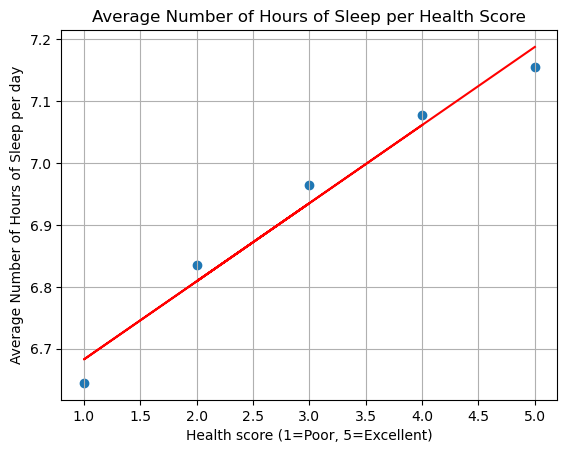

In [22]:
# Build scatter plot
y_values=mean_values_df['SleepHours']
x_values=mean_values_df['Health Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Average Number of Hours of Sleep per day')
plt.xlabel('Health score (1=Poor, 5=Excellent)')
plt.grid()
plt.title(f"Average Number of Hours of Sleep per Health Score")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
# Save the figure
plt.savefig("output_data/Sleep_vs_Health.png")

r_squared=rvalue**2
print(f"The R-Squared value is: {r_squared}")
# Show plot
plt.show()


In [20]:
Nine_hours_df=cleaned_data3_df[cleaned_data3_df['SleepHours']==9.0]
Nine_hours_df

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,HealthScore
35,Washington,Female,Fair,Yes,9.0,No,22.27,Yes,2
47,Washington,Male,Good,Yes,9.0,Yes,21.97,No,3
48,South Dakota,Male,Fair,Yes,9.0,No,28.59,Yes,2
57,Arizona,Female,Good,Yes,9.0,Yes,29.05,Yes,3
69,Washington,Male,Good,Yes,9.0,No,25.09,No,3
...,...,...,...,...,...,...,...,...,...
111094,Washington,Male,Very good,Yes,9.0,No,25.84,Yes,4
111124,Vermont,Male,Good,No,9.0,No,35.73,Yes,3
111140,Utah,Female,Fair,No,9.0,No,21.97,No,2
111186,Georgia,Male,Excellent,Yes,9.0,No,28.63,No,5


In [22]:
Health_counts_nine_df=Nine_hours_df.groupby('GeneralHealth').size().reset_index(name='Count')
Health_counts_nine_df

,GeneralHealth,Count
0,Excellent,751
1,Fair,670
2,Good,1467
3,Poor,184
4,Very good,1445


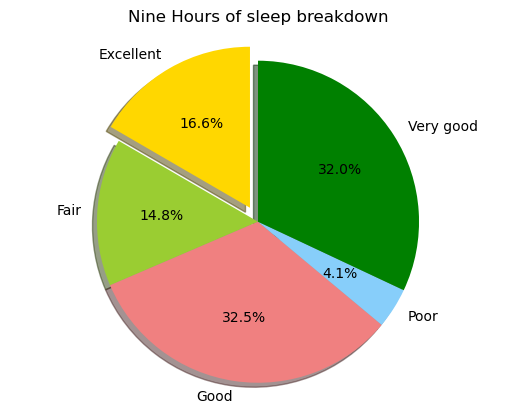

In [23]:
# Data for the pie chart
labels = Health_counts_nine_df['GeneralHealth']
sizes = Health_counts_nine_df['Count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']  # Colors for each segment
explode = (0.1, 0, 0, 0,0)  # explode the 1st slice 

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Title of the chart
plt.title('Nine Hours of sleep breakdown')

# Save the figure
plt.savefig("output_data/Nine_hours_pie.png")

# Display the pie chart
plt.show()

In [24]:
Five_hours_df=cleaned_data3_df[cleaned_data3_df['SleepHours']==5.0]
Five_hours_df

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,HealthScore
17,Arizona,Female,Very good,Yes,5.0,Yes,27.12,Yes,4
18,Minnesota,Female,Very good,Yes,5.0,No,25.09,No,4
23,Missouri,Male,Good,Yes,5.0,No,30.27,Yes,3
30,Puerto Rico,Male,Fair,Yes,5.0,Yes,33.96,No,2
32,Wisconsin,Female,Good,Yes,5.0,No,21.95,No,3
...,...,...,...,...,...,...,...,...,...
111197,Wisconsin,Male,Very good,Yes,5.0,No,25.68,Yes,4
111234,Washington,Female,Very good,Yes,5.0,No,23.03,Yes,4
111246,Hawaii,Male,Fair,Yes,5.0,No,29.70,No,2
111266,Guam,Female,Good,Yes,5.0,No,22.46,No,3


In [25]:
Health_counts_five_df=Five_hours_df.groupby('GeneralHealth').size().reset_index(name='Count')
Health_counts_five_df

,GeneralHealth,Count
0,Excellent,680
1,Fair,1294
2,Good,2157
3,Poor,538
4,Very good,1525


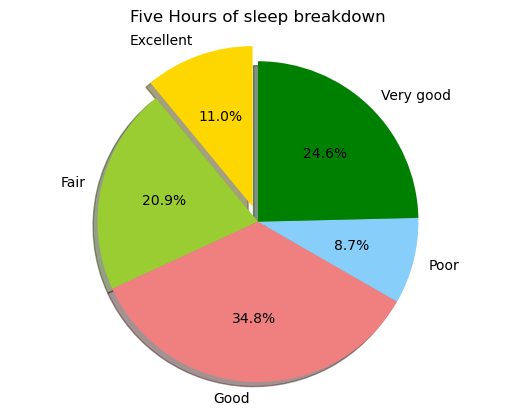

In [26]:
# Data for the pie chart
labels = Health_counts_five_df['GeneralHealth']
sizes = Health_counts_five_df['Count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']  # Colors for each segment
explode = (0.1, 0, 0, 0,0)  # explode the 1st slice 

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Title of the chart
plt.title('Five Hours of sleep breakdown')

# Save the figure
plt.savefig("output_data/Five_Hours_pie.png")
# Display the pie chart
plt.show()